In [1]:
import sys
sys.path.insert(0,'..')
import simulacra.star
import simulacra.tellurics
from simulacra.star import PhoenixModel

import random
random.seed(a=102102102)
import numpy as np
np.random.seed(102102102)

import astropy.io.fits
import astropy.time as at

import astropy.units as u
import astropy.coordinates as coord
import astropy.constants as const

/ext3/miniconda3/envs/simulacraenv/lib/python3.7/site-packages/pysynphot/locations.py:46: UserWarning: PYSYN_CDBS is undefined; functionality will be SEVERELY crippled.
  warnings.warn("PYSYN_CDBS is undefined; functionality will be SEVERELY "
/ext3/miniconda3/envs/simulacraenv/lib/python3.7/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


In [2]:
from datetime import datetime
import os
date = datetime.today().strftime('%Y-%m-%d')
outdir = os.path.join('/scratch/mdd423/simulacra/out/',date)
os.makedirs(outdir,exist_ok=True)

In [3]:
ra, dec = np.random.uniform(0,360) * u.degree, np.random.uniform(0,80) * u.degree
obs = 'APO'
loc = coord.EarthLocation.of_site(obs)
target = coord.SkyCoord(ra,dec,frame='icrs')

In [4]:
tstart = at.Time('2020-01-01T08:10:00.123456789',format='isot',scale='utc')
tend   = tstart + 720 * u.day
night_grid = simulacra.star.get_night_grid(loc,tstart,tend,steps_per_night=20)
possible_times, airmass = simulacra.star.get_realistic_times(target,loc,night_grid)

In [5]:
epoches = 30

Now we selected some random sample of these to observe at and the airmasses at those times

In [6]:
obs_ints = random.sample(range(len(airmass)),epoches)
obs_times, obs_airmass = possible_times[obs_ints], airmass[obs_ints]

<h2>Tellurics Model</h2>
The tellurics model requires these airmasses at the time of observation. However each of the pressure, temperatures, and humidities can be set by the user after initialization. If a single value is passed that is used for every epoch. Or you can pass it an array of quantities of size equal to the number of epoches.

In [7]:
wave_min = 700*u.nm
wave_max = 900*u.nm
tellurics_model = simulacra.tellurics.TelFitModel(wave_min,wave_max,loc)

<h2>Star Model</h2>
Here we define the star model with some temperature, distance, logg, and companion parameters. The logg, T, z, and alpha parameters must correspond to an appropriate atmosphere model from the PHOENIX libraray online. Then also give it some companion parameters that could affect its velocity. This is what we will be trying to find use jabble.

In [8]:
from simulacra.detector import Detector, spacing_from_res

<h2>Detector</h2>
Here we define our detector giving it an aperature area, resolution, dark current, read noise, and ccd efficiency. All of these can be except area can be given as an array of the same size as the wave_grid (eg. if the detector has varying resolution or noise levels)

In [9]:
import matplotlib.pyplot as plt
import scipy.ndimage
def normalize(y,yerr,sigma):
    y_low = scipy.ndimage.gaussian_filter(y,sigma)
    return y/y_low, yerr/y

In [10]:
resolution = 70_000.0
area = np.pi*(4.3 * u.m/2)**2
exp_times = 8 * np.ones(epoches)* u.minute 
dark_current = 1/u.s
read_noise   = 1
ccd_eff      = 0.99
through_put  = 3e-7

epsilon = 1.0
w = 0.0
gamma = 1.0

delta_x = spacing_from_res(2*resolution)
x_grid = np.arange(np.log(wave_min.to(u.Angstrom).value),np.log(wave_max.to(u.Angstrom).value),delta_x)
wave_grid = np.exp(x_grid) * u.Angstrom

<h2>Simulations</h2>
Now we are going to simulate this star with the same detector defined by the above parameters at many different distances.

In [11]:
distances = [5 * u.pc, 10 * u.pc, 20*u.pc, 50*u.pc, 100 * u.pc, 150 * u.pc, 200 * u.pc, 250 * u.pc, 300 * u.pc, 350 * u.pc, 400 * u.pc]

Now Simulate! And plot outputs before saving!

In [12]:
logg = 1.0
T    = 4800
z    = -1.0
alpha= 0.4
amplitude = 2 * u.km/u.s
period    = 40.3 * u.day

using saved wave file
../data/stellar/PHOENIX/lte04800-1.00-1.0.Alpha=+0.40.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits
using saved flux file
reading in ../data/stellar/PHOENIX/WAVE_PHOENIX-ACES-AGSS-COND-2011.fits
wave_grid min -> 701.0 nm
surface flux: mean 1.31e+14 erg / (cm3 s)	 median 1.14e+14 erg / (cm3 s)
obs     flux: mean 1.51e+01 erg / (cm3 s)	 median 1.31e+01 erg / (cm3 s)


resetting...


generating spectra...
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 62.8613757400191


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.18user 1.14system 0:04.73elapsed 70%CPU (0avgtext+0avgdata 7608maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.94user 0.90system 0:02.07elapsed 89%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 36.420938571519066


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.84system 0:03.19elapsed 93%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.69system 0:01.74elapsed 92%CPU (0avgtext+0avgdata 7668maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 42.79961082627774


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 0.80system 0:03.30elapsed 89%CPU (0avgtext+0avgdata 7632maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.70system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7668maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 44.62927519288961


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 0.78system 0:03.27elapsed 89%CPU (0avgtext+0avgdata 7688maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.71system 0:01.72elapsed 94%CPU (0avgtext+0avgdata 7668maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 31.567632273477905


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.09user 0.87system 0:03.20elapsed 92%CPU (0avgtext+0avgdata 7704maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.70system 0:01.70elapsed 94%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 44.219986042892295


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.17user 0.77system 0:03.28elapsed 89%CPU (0avgtext+0avgdata 7560maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.72system 0:01.74elapsed 94%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 55.209073951412215


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.08user 0.83system 0:03.17elapsed 91%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.72system 0:01.72elapsed 95%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1127403
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 16.046253531664348


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 0.80system 0:03.16elapsed 93%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.69system 0:01.70elapsed 94%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 70.36083125348077


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.18user 0.81system 0:03.18elapsed 94%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.94user 0.68system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7668maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 5.621114858253093


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 0.82system 0:03.15elapsed 93%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.87user 0.73system 0:01.70elapsed 94%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
<simulacra.tellurics.TelFitModel object at 0x145c0d5fc9b0> [1.6178939077349241e-06, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.2146180711501984e-07, 2.2147022882279543e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.2717149938955572e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1996264365498064e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07]
interpolating spline...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
combining grids...
convolving...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
2

../simulacra/detector.py:529: RuntimeWarning: invalid value encountered in add_noise_v
  n_readout = add_noise_v(n_exp.flatten().value,snr_grid.flatten()).reshape(out_shape)


generating errors...
done.
/scratch/mdd423/simulacra/out/2021-11-02/data_e30_R70000.0_a2000.0_p40.3_l7.0e+039.0e+03_ep1.0_w0.0_snr7.9e+02_tp3e-07


../simulacra/detector.py:541: RuntimeWarning: invalid value encountered in generate_errors_v
  nerr_out = generate_errors_v(n_readout.flatten(),snr_readout.flatten()).reshape(out_shape)


saving time
quantity
epoches  saving as string
quantity
quantity
quantity
quantity
quantity
quantity
quantity
flux  saving as string
wave  saving as string
quantity
quantity
quantity
alpha  saving as string
quantity
quantity
fluxname  saving as string
generate_spectra  saving as string
quantity
quantity
logg  saving as string
outdir  saving as string
quantity
plot  saving as string
plot_interpolated  saving as string
quantity
quantity
saving target...340.28129510273834 deg 28.43612929851907 deg
temperature  saving as string
quantity
quantity
wavename  saving as string
quantity
z  saving as string
quantity
quantity
quantity
quantity
a  saving as string
add_model  saving as string
quantity
checkmax  saving as string
checkmin  saving as string
quantity
epsilon  saving as string
gamma  saving as string
quantity
quantity
quantity
lsf_centering  saving as string
lsf_const_coeffs  saving as string
resolution  saving as string
sigma  saving as string
sigma_range  saving as string
simulate  sav

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 0.82system 0:03.18elapsed 93%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.71system 0:01.72elapsed 94%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 36.420938571519066


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.10user 0.84system 0:03.21elapsed 91%CPU (0avgtext+0avgdata 7560maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.88user 0.72system 0:01.70elapsed 94%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 70.23515457427514


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.19user 0.79system 0:03.31elapsed 90%CPU (0avgtext+0avgdata 7560maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.95user 0.67system 0:01.73elapsed 93%CPU (0avgtext+0avgdata 7688maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 37.41097711185363


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.85system 0:03.33elapsed 89%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.71system 0:01.72elapsed 93%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 65.09115788813192


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.10user 0.82system 0:03.14elapsed 93%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.75system 0:01.74elapsed 94%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1127370
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 59.94944845829285


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.82system 0:03.26elapsed 90%CPU (0avgtext+0avgdata 7628maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.95user 0.69system 0:01.73elapsed 94%CPU (0avgtext+0avgdata 7576maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1124676
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 27.811520651072378


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.08user 0.86system 0:03.22elapsed 91%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.69system 0:01.76elapsed 91%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 4.6273790635876395


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.80system 0:03.20elapsed 91%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.87user 0.73system 0:01.79elapsed 89%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 11.404396925323324


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 0.80system 0:03.46elapsed 84%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.72system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 54.85857323188904


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.83system 0:03.46elapsed 85%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.71system 0:01.70elapsed 94%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps


1111626
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 27.82399986133828


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 0.85system 0:03.26elapsed 90%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.73system 0:01.77elapsed 93%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 32.81380139483823


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 0.81system 0:03.59elapsed 82%CPU (0avgtext+0avgdata 7560maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.72system 0:01.72elapsed 94%CPU (0avgtext+0avgdata 7712maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 5.685228205863384


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 0.84system 0:03.19elapsed 92%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.94user 0.67system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 50.422615509223334


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 0.79system 0:03.09elapsed 95%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.72system 0:01.76elapsed 92%CPU (0avgtext+0avgdata 7704maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 66.89041188034572


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 0.83system 0:03.22elapsed 92%CPU (0avgtext+0avgdata 7628maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.72system 0:01.76elapsed 93%CPU (0avgtext+0avgdata 7572maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 65.6425420077903


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.88system 0:03.22elapsed 93%CPU (0avgtext+0avgdata 7572maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.72system 0:01.72elapsed 94%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 4.244341434002005


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.85system 0:03.18elapsed 93%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.88user 0.74system 0:01.76elapsed 92%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 25.73402125733466


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.80system 0:03.21elapsed 91%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.70system 0:01.73elapsed 92%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 41.82411679419448


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 0.85system 0:03.31elapsed 90%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.74system 0:01.73elapsed 94%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1232minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 19.147041951230698


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.83system 0:03.24elapsed 91%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.70system 0:01.75elapsed 92%CPU (0avgtext+0avgdata 7816maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 38.23670948006227


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 0.83system 0:03.28elapsed 91%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.94user 0.66system 0:01.70elapsed 94%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 47.73236591064268


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 0.83system 0:03.44elapsed 86%CPU (0avgtext+0avgdata 7628maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.75system 0:01.72elapsed 95%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 42.79961082627774


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 0.80system 0:03.44elapsed 86%CPU (0avgtext+0avgdata 7628maxresident)k
0inputs+0outputs (0major+1232minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.72system 0:01.77elapsed 92%CPU (0avgtext+0avgdata 7708maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 44.62927519288961


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.81system 0:03.18elapsed 92%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.73system 0:01.76elapsed 93%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 31.567632273477905


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 0.78system 0:03.13elapsed 93%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.93user 0.70system 0:01.75elapsed 93%CPU (0avgtext+0avgdata 7632maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 44.219986042892295


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.82system 0:03.21elapsed 91%CPU (0avgtext+0avgdata 7628maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.73system 0:01.77elapsed 92%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 55.209073951412215


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.04user 0.86system 0:03.04elapsed 95%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.94user 0.70system 0:01.74elapsed 94%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1127403
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 16.046253531664348


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.83system 0:03.43elapsed 86%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.70system 0:01.70elapsed 94%CPU (0avgtext+0avgdata 7636maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 70.36083125348077


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.20user 0.80system 0:03.26elapsed 92%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.73system 0:01.75elapsed 93%CPU (0avgtext+0avgdata 7520maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 5.621114858253093


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 0.78system 0:03.12elapsed 93%CPU (0avgtext+0avgdata 7564maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.87user 0.73system 0:01.70elapsed 94%CPU (0avgtext+0avgdata 7560maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
<simulacra.tellurics.TelFitModel object at 0x145c0d5fc9b0> [1.6178939077349241e-06, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.2146180711501984e-07, 2.2147022882279543e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.2717149938955572e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1996264365498064e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07]
interpolating spline...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
combining grids...
convolving...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
2

../simulacra/detector.py:529: RuntimeWarning: invalid value encountered in add_noise_v
  n_readout = add_noise_v(n_exp.flatten().value,snr_grid.flatten()).reshape(out_shape)


generating errors...
done.
/scratch/mdd423/simulacra/out/2021-11-02/data_e30_R70000.0_a2000.0_p40.3_l7.0e+039.0e+03_ep1.0_w0.0_snr4.0e+02_tp3e-07
saving time
quantity
epoches  saving as string
quantity
quantity
quantity
quantity
quantity


../simulacra/detector.py:541: RuntimeWarning: invalid value encountered in generate_errors_v
  nerr_out = generate_errors_v(n_readout.flatten(),snr_readout.flatten()).reshape(out_shape)


quantity
quantity
flux  saving as string
wave  saving as string
quantity
quantity
quantity
alpha  saving as string
quantity
quantity
fluxname  saving as string
generate_spectra  saving as string
quantity
quantity
logg  saving as string
outdir  saving as string
quantity
plot  saving as string
plot_interpolated  saving as string
quantity
quantity
saving target...340.28129510273834 deg 28.43612929851907 deg
temperature  saving as string
quantity
quantity
wavename  saving as string
quantity
z  saving as string
quantity
quantity
quantity
quantity
a  saving as string
add_model  saving as string
quantity
checkmax  saving as string
checkmin  saving as string
quantity
epsilon  saving as string
gamma  saving as string
quantity
quantity
quantity
lsf_centering  saving as string
lsf_const_coeffs  saving as string
resolution  saving as string
sigma  saving as string
sigma_range  saving as string
simulate  saving as string
stellar_model  saving as string
through_put  saving as string
transmission_cut

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.84system 0:03.15elapsed 94%CPU (0avgtext+0avgdata 7572maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.71system 0:01.72elapsed 94%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 36.420938571519066


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 0.84system 0:03.13elapsed 94%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.72system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7668maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 70.23515457427514


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.17user 0.80system 0:03.16elapsed 94%CPU (0avgtext+0avgdata 7648maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.73system 0:01.74elapsed 93%CPU (0avgtext+0avgdata 7728maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 37.41097711185363


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.80system 0:03.12elapsed 94%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.69system 0:01.73elapsed 93%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 65.09115788813192


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.80system 0:03.06elapsed 95%CPU (0avgtext+0avgdata 7628maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.72system 0:01.74elapsed 94%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1127370
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 59.94944845829285


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.10user 0.81system 0:03.70elapsed 78%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.95user 0.70system 0:01.78elapsed 93%CPU (0avgtext+0avgdata 7576maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1124676
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 27.811520651072378


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 0.86system 0:03.19elapsed 93%CPU (0avgtext+0avgdata 7740maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.73system 0:01.73elapsed 94%CPU (0avgtext+0avgdata 7708maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 4.6273790635876395


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.83system 0:03.13elapsed 94%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.72system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7516maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 11.404396925323324


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 0.83system 0:03.21elapsed 91%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.86user 0.74system 0:01.70elapsed 94%CPU (0avgtext+0avgdata 7788maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 54.85857323188904


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.83system 0:03.15elapsed 94%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.87user 0.72system 0:01.69elapsed 94%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1111626
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 27.82399986133828


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 0.79system 0:03.14elapsed 93%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.71system 0:01.70elapsed 94%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 32.81380139483823


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 0.79system 0:03.19elapsed 92%CPU (0avgtext+0avgdata 7560maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.71system 0:01.72elapsed 94%CPU (0avgtext+0avgdata 7520maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 5.685228205863384


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.82system 0:03.15elapsed 93%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.70system 0:01.70elapsed 94%CPU (0avgtext+0avgdata 7640maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 50.422615509223334


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 0.84system 0:03.15elapsed 94%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.70system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 66.89041188034572


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 0.81system 0:03.13elapsed 95%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.94user 0.67system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 65.6425420077903


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 0.83system 0:03.19elapsed 93%CPU (0avgtext+0avgdata 7676maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.70system 0:01.74elapsed 92%CPU (0avgtext+0avgdata 7688maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 4.244341434002005


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.85system 0:03.22elapsed 92%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.71system 0:01.72elapsed 94%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 25.73402125733466


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.10user 0.85system 0:03.16elapsed 93%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.73system 0:01.75elapsed 93%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 41.82411679419448


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 0.82system 0:03.18elapsed 93%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.68system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7676maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 19.147041951230698


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.82system 0:03.19elapsed 92%CPU (0avgtext+0avgdata 7712maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.71system 0:01.70elapsed 94%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 38.23670948006227


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 0.78system 0:03.18elapsed 92%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.70system 0:01.74elapsed 93%CPU (0avgtext+0avgdata 7632maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 47.73236591064268


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.17user 0.80system 0:03.23elapsed 91%CPU (0avgtext+0avgdata 7628maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.71system 0:01.71elapsed 95%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 42.79961082627774


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 0.86system 0:03.18elapsed 93%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.94user 0.68system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7636maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 44.62927519288961


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.81system 0:03.14elapsed 93%CPU (0avgtext+0avgdata 7564maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.70system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 31.567632273477905


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 0.79system 0:03.16elapsed 93%CPU (0avgtext+0avgdata 7708maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.93user 0.71system 0:01.71elapsed 95%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 44.219986042892295


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.17user 0.80system 0:03.13elapsed 94%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.70system 0:01.74elapsed 92%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 55.209073951412215


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.05user 0.85system 0:03.08elapsed 94%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.74system 0:01.77elapsed 94%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1127403
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 16.046253531664348


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 0.82system 0:03.09elapsed 95%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.69system 0:01.76elapsed 91%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 70.36083125348077


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.17user 0.80system 0:03.16elapsed 94%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.93user 0.70system 0:01.75elapsed 93%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 5.621114858253093


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.09user 0.85system 0:03.13elapsed 94%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.72system 0:01.74elapsed 92%CPU (0avgtext+0avgdata 7640maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
<simulacra.tellurics.TelFitModel object at 0x145c0d5fc9b0> [1.6178939077349241e-06, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.2146180711501984e-07, 2.2147022882279543e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.2717149938955572e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1996264365498064e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07]
interpolating spline...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
combining grids...
convolving...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
2

../simulacra/detector.py:529: RuntimeWarning: invalid value encountered in add_noise_v
  n_readout = add_noise_v(n_exp.flatten().value,snr_grid.flatten()).reshape(out_shape)


generating errors...
done.
/scratch/mdd423/simulacra/out/2021-11-02/data_e30_R70000.0_a2000.0_p40.3_l7.0e+039.0e+03_ep1.0_w0.0_snr2.0e+02_tp3e-07
saving time
quantity
epoches  saving as string
quantity
quantity
quantity
quantity
quantity


../simulacra/detector.py:541: RuntimeWarning: invalid value encountered in generate_errors_v
  nerr_out = generate_errors_v(n_readout.flatten(),snr_readout.flatten()).reshape(out_shape)


quantity
quantity
flux  saving as string
wave  saving as string
quantity
quantity
quantity
alpha  saving as string
quantity
quantity
fluxname  saving as string
generate_spectra  saving as string
quantity
quantity
logg  saving as string
outdir  saving as string
quantity
plot  saving as string
plot_interpolated  saving as string
quantity
quantity
saving target...340.28129510273834 deg 28.43612929851907 deg
temperature  saving as string
quantity
quantity
wavename  saving as string
quantity
z  saving as string
quantity
quantity
quantity
quantity
a  saving as string
add_model  saving as string
quantity
checkmax  saving as string
checkmin  saving as string
quantity
epsilon  saving as string
gamma  saving as string
quantity
quantity
quantity
lsf_centering  saving as string
lsf_const_coeffs  saving as string
resolution  saving as string
sigma  saving as string
sigma_range  saving as string
simulate  saving as string
stellar_model  saving as string
through_put  saving as string
transmission_cut

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.84system 0:03.18elapsed 93%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.71system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 36.420938571519066


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 0.80system 0:03.26elapsed 90%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.70system 0:01.75elapsed 93%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 70.23515457427514


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.18user 0.80system 0:03.19elapsed 93%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.73system 0:01.76elapsed 94%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 37.41097711185363


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.83system 0:03.20elapsed 92%CPU (0avgtext+0avgdata 7616maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.72system 0:01.76elapsed 92%CPU (0avgtext+0avgdata 7788maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 65.09115788813192


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.78system 0:03.08elapsed 94%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.70system 0:01.81elapsed 89%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1127370
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 59.94944845829285


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 0.77system 0:03.19elapsed 90%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.74system 0:01.78elapsed 93%CPU (0avgtext+0avgdata 7716maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1124676
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 27.811520651072378


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.09user 0.84system 0:03.14elapsed 93%CPU (0avgtext+0avgdata 7644maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.72system 0:01.76elapsed 91%CPU (0avgtext+0avgdata 7636maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 4.6273790635876395


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 0.81system 0:03.15elapsed 93%CPU (0avgtext+0avgdata 7636maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.69system 0:01.72elapsed 92%CPU (0avgtext+0avgdata 7816maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 11.404396925323324


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.80system 0:03.12elapsed 93%CPU (0avgtext+0avgdata 7548maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.70system 0:01.72elapsed 93%CPU (0avgtext+0avgdata 7516maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 54.85857323188904


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.82system 0:03.13elapsed 94%CPU (0avgtext+0avgdata 7564maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.71system 0:01.70elapsed 94%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1111626
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 27.82399986133828


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 0.78system 0:03.23elapsed 91%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.88user 0.72system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 32.81380139483823


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.80system 0:03.14elapsed 93%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.72system 0:01.69elapsed 95%CPU (0avgtext+0avgdata 7612maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 5.685228205863384


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.84system 0:03.15elapsed 93%CPU (0avgtext+0avgdata 7636maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.87user 0.73system 0:01.70elapsed 94%CPU (0avgtext+0avgdata 7636maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 50.422615509223334


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.82system 0:03.23elapsed 91%CPU (0avgtext+0avgdata 7572maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.72system 0:01.70elapsed 94%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 66.89041188034572


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.18user 0.83system 0:03.27elapsed 92%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.72system 0:01.73elapsed 94%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 65.6425420077903


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 0.80system 0:03.16elapsed 93%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.71system 0:01.74elapsed 94%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 4.244341434002005


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.10user 0.83system 0:03.21elapsed 91%CPU (0avgtext+0avgdata 7636maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.72system 0:01.72elapsed 94%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 25.73402125733466


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.81system 0:03.21elapsed 91%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.72system 0:01.77elapsed 91%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 41.82411679419448


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 0.83system 0:03.15elapsed 95%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.71system 0:01.75elapsed 92%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 19.147041951230698


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.82system 0:03.16elapsed 93%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.69system 0:01.76elapsed 91%CPU (0avgtext+0avgdata 7708maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 38.23670948006227


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 0.82system 0:03.16elapsed 93%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.88user 0.73system 0:01.75elapsed 92%CPU (0avgtext+0avgdata 7668maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 47.73236591064268


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.19user 0.77system 0:03.19elapsed 92%CPU (0avgtext+0avgdata 7628maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.72system 0:01.72elapsed 94%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 42.79961082627774


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.84system 0:03.13elapsed 94%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.73system 0:01.73elapsed 93%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 44.62927519288961


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 0.81system 0:03.10elapsed 95%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.71system 0:01.75elapsed 93%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 31.567632273477905


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.85system 0:03.16elapsed 94%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.69system 0:01.69elapsed 95%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 44.219986042892295


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 0.83system 0:03.18elapsed 94%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.71system 0:01.70elapsed 94%CPU (0avgtext+0avgdata 7688maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 55.209073951412215


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.08user 0.80system 0:03.08elapsed 93%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.93user 0.70system 0:01.73elapsed 94%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1127403
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 16.046253531664348


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.81system 0:03.22elapsed 91%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.71system 0:01.72elapsed 94%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 70.36083125348077


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.17user 0.83system 0:03.16elapsed 95%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.71system 0:01.73elapsed 94%CPU (0avgtext+0avgdata 7788maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 5.621114858253093


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 0.84system 0:03.11elapsed 95%CPU (0avgtext+0avgdata 7676maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.88user 0.73system 0:01.79elapsed 90%CPU (0avgtext+0avgdata 7712maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
<simulacra.tellurics.TelFitModel object at 0x145c0d5fc9b0> [1.6178939077349241e-06, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.2146180711501984e-07, 2.2147022882279543e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.2717149938955572e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1996264365498064e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07]
interpolating spline...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
combining grids...
convolving...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
2

../simulacra/detector.py:529: RuntimeWarning: invalid value encountered in add_noise_v
  n_readout = add_noise_v(n_exp.flatten().value,snr_grid.flatten()).reshape(out_shape)


generating errors...
done.
/scratch/mdd423/simulacra/out/2021-11-02/data_e30_R70000.0_a2000.0_p40.3_l7.0e+039.0e+03_ep1.0_w0.0_snr7.7e+01_tp3e-07
saving time
quantity
epoches  saving as string
quantity
quantity
quantity
quantity
quantity


../simulacra/detector.py:541: RuntimeWarning: invalid value encountered in generate_errors_v
  nerr_out = generate_errors_v(n_readout.flatten(),snr_readout.flatten()).reshape(out_shape)


quantity
quantity
flux  saving as string
wave  saving as string
quantity
quantity
quantity
alpha  saving as string
quantity
quantity
fluxname  saving as string
generate_spectra  saving as string
quantity
quantity
logg  saving as string
outdir  saving as string
quantity
plot  saving as string
plot_interpolated  saving as string
quantity
quantity
saving target...340.28129510273834 deg 28.43612929851907 deg
temperature  saving as string
quantity
quantity
wavename  saving as string
quantity
z  saving as string
quantity
quantity
quantity
quantity
a  saving as string
add_model  saving as string
quantity
checkmax  saving as string
checkmin  saving as string
quantity
epsilon  saving as string
gamma  saving as string
quantity
quantity
quantity
lsf_centering  saving as string
lsf_const_coeffs  saving as string
resolution  saving as string
sigma  saving as string
sigma_range  saving as string
simulate  saving as string
stellar_model  saving as string
through_put  saving as string
transmission_cut

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 0.83system 0:03.14elapsed 95%CPU (0avgtext+0avgdata 7560maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.70system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 36.420938571519066


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 0.85system 0:03.28elapsed 90%CPU (0avgtext+0avgdata 7688maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.72system 0:01.72elapsed 95%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 70.23515457427514


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 0.81system 0:03.25elapsed 91%CPU (0avgtext+0avgdata 7648maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.70system 0:01.76elapsed 92%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 37.41097711185363


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 0.82system 0:03.20elapsed 92%CPU (0avgtext+0avgdata 7668maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.71system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 65.09115788813192


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 0.82system 0:03.18elapsed 92%CPU (0avgtext+0avgdata 7524maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.70system 0:01.73elapsed 94%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1127370
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 59.94944845829285


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.82system 0:03.07elapsed 95%CPU (0avgtext+0avgdata 7728maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.94user 0.71system 0:01.77elapsed 93%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1124676
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 27.811520651072378


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 0.80system 0:03.17elapsed 92%CPU (0avgtext+0avgdata 7716maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.73system 0:01.73elapsed 93%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 4.6273790635876395


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.83system 0:03.08elapsed 96%CPU (0avgtext+0avgdata 7708maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.86user 0.74system 0:01.71elapsed 93%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 11.404396925323324


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 0.82system 0:03.22elapsed 92%CPU (0avgtext+0avgdata 7636maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.69system 0:01.70elapsed 94%CPU (0avgtext+0avgdata 7728maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 54.85857323188904


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 0.85system 0:03.12elapsed 95%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.88user 0.71system 0:01.69elapsed 94%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1111626
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 27.82399986133828


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 0.81system 0:03.14elapsed 94%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.87user 0.75system 0:01.69elapsed 95%CPU (0avgtext+0avgdata 7552maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 32.81380139483823


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.80system 0:03.15elapsed 93%CPU (0avgtext+0avgdata 7560maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.69system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 5.685228205863384


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.81system 0:03.14elapsed 93%CPU (0avgtext+0avgdata 7728maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.70system 0:01.70elapsed 94%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 50.422615509223334


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.10user 0.89system 0:03.25elapsed 92%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.72system 0:01.74elapsed 94%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 66.89041188034572


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 0.81system 0:03.19elapsed 93%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.70system 0:01.72elapsed 94%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 65.6425420077903


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 0.83system 0:03.18elapsed 93%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.70system 0:01.74elapsed 93%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 4.244341434002005


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 0.77system 0:03.14elapsed 93%CPU (0avgtext+0avgdata 7528maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.68system 0:01.70elapsed 94%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 25.73402125733466


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.81system 0:03.15elapsed 93%CPU (0avgtext+0avgdata 7784maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.69system 0:01.73elapsed 93%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 41.82411679419448


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.10user 0.87system 0:03.16elapsed 93%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.72system 0:01.76elapsed 93%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 19.147041951230698


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.10user 0.87system 0:03.23elapsed 92%CPU (0avgtext+0avgdata 7816maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.71system 0:01.72elapsed 93%CPU (0avgtext+0avgdata 7712maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 38.23670948006227


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 0.78system 0:03.06elapsed 96%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.71system 0:01.74elapsed 92%CPU (0avgtext+0avgdata 7688maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 47.73236591064268


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 0.79system 0:03.16elapsed 93%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.93user 0.70system 0:01.75elapsed 93%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 42.79961082627774


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 0.83system 0:03.17elapsed 93%CPU (0avgtext+0avgdata 7628maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.70system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 44.62927519288961


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.84system 0:03.20elapsed 92%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.72system 0:01.73elapsed 94%CPU (0avgtext+0avgdata 7708maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 31.567632273477905


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.10user 0.83system 0:03.13elapsed 93%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.72system 0:01.69elapsed 95%CPU (0avgtext+0avgdata 7604maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 44.219986042892295


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 0.79system 0:03.19elapsed 92%CPU (0avgtext+0avgdata 7712maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.93user 0.69system 0:01.70elapsed 95%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 55.209073951412215


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.08user 0.85system 0:03.14elapsed 93%CPU (0avgtext+0avgdata 7560maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.72system 0:01.73elapsed 95%CPU (0avgtext+0avgdata 7552maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1127403
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 16.046253531664348


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.80system 0:03.19elapsed 92%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.88user 0.75system 0:01.73elapsed 94%CPU (0avgtext+0avgdata 7544maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 70.36083125348077


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 0.85system 0:03.18elapsed 94%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.87user 0.76system 0:01.74elapsed 93%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 5.621114858253093


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.85system 0:03.13elapsed 95%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.71system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
<simulacra.tellurics.TelFitModel object at 0x145c0d5fc9b0> [1.6178939077349241e-06, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.2146180711501984e-07, 2.2147022882279543e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.2717149938955572e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1996264365498064e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07]
interpolating spline...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
combining grids...
convolving...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
2

../simulacra/detector.py:529: RuntimeWarning: invalid value encountered in add_noise_v
  n_readout = add_noise_v(n_exp.flatten().value,snr_grid.flatten()).reshape(out_shape)


generating errors...
done.
/scratch/mdd423/simulacra/out/2021-11-02/data_e30_R70000.0_a2000.0_p40.3_l7.0e+039.0e+03_ep1.0_w0.0_snr3.5e+01_tp3e-07


../simulacra/detector.py:541: RuntimeWarning: invalid value encountered in generate_errors_v
  nerr_out = generate_errors_v(n_readout.flatten(),snr_readout.flatten()).reshape(out_shape)


saving time
quantity
epoches  saving as string
quantity
quantity
quantity
quantity
quantity
quantity
quantity
flux  saving as string
wave  saving as string
quantity
quantity
quantity
alpha  saving as string
quantity
quantity
fluxname  saving as string
generate_spectra  saving as string
quantity
quantity
logg  saving as string
outdir  saving as string
quantity
plot  saving as string
plot_interpolated  saving as string
quantity
quantity
saving target...340.28129510273834 deg 28.43612929851907 deg
temperature  saving as string
quantity
quantity
wavename  saving as string
quantity
z  saving as string
quantity
quantity
quantity
quantity
a  saving as string
add_model  saving as string
quantity
checkmax  saving as string
checkmin  saving as string
quantity
epsilon  saving as string
gamma  saving as string
quantity
quantity
quantity
lsf_centering  saving as string
lsf_const_coeffs  saving as string
resolution  saving as string
sigma  saving as string
sigma_range  saving as string
simulate  sav

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.17user 0.83system 0:03.31elapsed 90%CPU (0avgtext+0avgdata 7636maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.70system 0:01.72elapsed 94%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 36.420938571519066


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 0.85system 0:03.16elapsed 93%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.71system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 70.23515457427514


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.18user 0.79system 0:03.16elapsed 93%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.72system 0:01.75elapsed 92%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 37.41097711185363


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.82system 0:03.14elapsed 93%CPU (0avgtext+0avgdata 7520maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.68system 0:01.70elapsed 94%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 65.09115788813192


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.10user 0.84system 0:03.13elapsed 93%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.73system 0:01.70elapsed 95%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1127370
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 59.94944845829285


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.10user 0.79system 0:03.12elapsed 92%CPU (0avgtext+0avgdata 7560maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.94user 0.71system 0:01.74elapsed 94%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps


1124676
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 27.811520651072378


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.10user 0.88system 0:03.17elapsed 93%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.88user 0.72system 0:01.70elapsed 94%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 4.6273790635876395


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.08user 0.89system 0:03.24elapsed 92%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.71system 0:01.72elapsed 93%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 11.404396925323324


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 0.76system 0:03.20elapsed 91%CPU (0avgtext+0avgdata 7560maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.70system 0:01.73elapsed 92%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 54.85857323188904


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.10user 0.86system 0:03.10elapsed 95%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.70system 0:01.70elapsed 95%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1111626
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 27.82399986133828


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 0.86system 0:03.18elapsed 93%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.93user 0.67system 0:01.73elapsed 92%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 32.81380139483823


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 0.82system 0:03.10elapsed 94%CPU (0avgtext+0avgdata 7712maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.88user 0.73system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7636maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 5.685228205863384


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.81system 0:03.06elapsed 95%CPU (0avgtext+0avgdata 7608maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.70system 0:01.69elapsed 95%CPU (0avgtext+0avgdata 7716maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 50.422615509223334


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 0.79system 0:03.10elapsed 95%CPU (0avgtext+0avgdata 7716maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.93user 0.69system 0:01.72elapsed 94%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 66.89041188034572


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 0.82system 0:03.22elapsed 92%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.72system 0:01.70elapsed 95%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 65.6425420077903


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.18user 0.81system 0:03.16elapsed 94%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.72system 0:01.73elapsed 94%CPU (0avgtext+0avgdata 7576maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 4.244341434002005


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.84system 0:03.15elapsed 94%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.88user 0.73system 0:01.72elapsed 94%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 25.73402125733466


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.82system 0:03.16elapsed 93%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.70system 0:01.70elapsed 94%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 41.82411679419448


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 0.79system 0:03.19elapsed 92%CPU (0avgtext+0avgdata 7636maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.72system 0:01.74elapsed 93%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 19.147041951230698


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.08user 0.87system 0:03.19elapsed 92%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.88user 0.75system 0:01.73elapsed 94%CPU (0avgtext+0avgdata 7616maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 38.23670948006227


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.85system 0:03.20elapsed 93%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.87user 0.73system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7636maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 47.73236591064268


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.85system 0:03.15elapsed 94%CPU (0avgtext+0avgdata 7632maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.75system 0:01.72elapsed 95%CPU (0avgtext+0avgdata 7636maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 42.79961082627774


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 0.83system 0:03.09elapsed 95%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.72system 0:01.79elapsed 91%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 44.62927519288961


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 0.82system 0:03.11elapsed 95%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.72system 0:01.74elapsed 92%CPU (0avgtext+0avgdata 7688maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 31.567632273477905


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.81system 0:03.17elapsed 92%CPU (0avgtext+0avgdata 7560maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.93user 0.68system 0:01.75elapsed 92%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 44.219986042892295


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 0.80system 0:03.15elapsed 93%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.71system 0:01.75elapsed 93%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 55.209073951412215


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.06user 0.85system 0:03.13elapsed 93%CPU (0avgtext+0avgdata 7628maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.72system 0:01.73elapsed 94%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1127403
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 16.046253531664348


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 0.81system 0:03.09elapsed 95%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.71system 0:01.69elapsed 95%CPU (0avgtext+0avgdata 7728maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 70.36083125348077


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.18user 0.82system 0:03.19elapsed 93%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.73system 0:01.72elapsed 94%CPU (0avgtext+0avgdata 7552maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 5.621114858253093


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.84system 0:03.15elapsed 94%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.87user 0.74system 0:01.69elapsed 95%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
<simulacra.tellurics.TelFitModel object at 0x145c0d5fc9b0> [1.6178939077349241e-06, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.2146180711501984e-07, 2.2147022882279543e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.2717149938955572e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1996264365498064e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07]
interpolating spline...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
combining grids...
convolving...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
2

../simulacra/detector.py:529: RuntimeWarning: invalid value encountered in add_noise_v
  n_readout = add_noise_v(n_exp.flatten().value,snr_grid.flatten()).reshape(out_shape)


generating errors...
done.
/scratch/mdd423/simulacra/out/2021-11-02/data_e30_R70000.0_a2000.0_p40.3_l7.0e+039.0e+03_ep1.0_w0.0_snr2.1e+01_tp3e-07
saving time
quantity
epoches  saving as string
quantity
quantity
quantity
quantity
quantity


../simulacra/detector.py:541: RuntimeWarning: invalid value encountered in generate_errors_v
  nerr_out = generate_errors_v(n_readout.flatten(),snr_readout.flatten()).reshape(out_shape)


quantity
quantity
flux  saving as string
wave  saving as string
quantity
quantity
quantity
alpha  saving as string
quantity
quantity
fluxname  saving as string
generate_spectra  saving as string
quantity
quantity
logg  saving as string
outdir  saving as string
quantity
plot  saving as string
plot_interpolated  saving as string
quantity
quantity
saving target...340.28129510273834 deg 28.43612929851907 deg
temperature  saving as string
quantity
quantity
wavename  saving as string
quantity
z  saving as string
quantity
quantity
quantity
quantity
a  saving as string
add_model  saving as string
quantity
checkmax  saving as string
checkmin  saving as string
quantity
epsilon  saving as string
gamma  saving as string
quantity
quantity
quantity
lsf_centering  saving as string
lsf_const_coeffs  saving as string
resolution  saving as string
sigma  saving as string
sigma_range  saving as string
simulate  saving as string
stellar_model  saving as string
through_put  saving as string
transmission_cut

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.17user 0.82system 0:03.22elapsed 93%CPU (0avgtext+0avgdata 7712maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.71system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7676maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 36.420938571519066


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 0.78system 0:03.09elapsed 94%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.70system 0:01.68elapsed 95%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 70.23515457427514


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 0.85system 0:03.17elapsed 94%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.71system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 37.41097711185363


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 0.79system 0:03.15elapsed 93%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.70system 0:01.69elapsed 95%CPU (0avgtext+0avgdata 7716maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 65.09115788813192


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 0.83system 0:03.12elapsed 94%CPU (0avgtext+0avgdata 7572maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.72system 0:01.76elapsed 92%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1127370
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 59.94944845829285


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.09user 0.80system 0:03.06elapsed 94%CPU (0avgtext+0avgdata 7712maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.98user 0.67system 0:01.83elapsed 90%CPU (0avgtext+0avgdata 7668maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1124676
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 27.811520651072378


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 0.86system 0:03.14elapsed 94%CPU (0avgtext+0avgdata 7640maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.72system 0:01.72elapsed 94%CPU (0avgtext+0avgdata 7744maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 4.6273790635876395


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 0.77system 0:03.10elapsed 94%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.71system 0:01.72elapsed 93%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 11.404396925323324


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.10user 0.85system 0:03.16elapsed 93%CPU (0avgtext+0avgdata 7528maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.70system 0:01.68elapsed 95%CPU (0avgtext+0avgdata 7552maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 54.85857323188904


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.10user 0.82system 0:03.15elapsed 93%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.67system 0:01.69elapsed 94%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1111626
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 27.82399986133828


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.83system 0:03.14elapsed 94%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.71system 0:01.69elapsed 95%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 32.81380139483823


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.83system 0:03.13elapsed 94%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.72system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7708maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 5.685228205863384


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 0.84system 0:03.13elapsed 94%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.72system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7516maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 50.422615509223334


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.84system 0:03.21elapsed 92%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.72system 0:01.72elapsed 94%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 66.89041188034572


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 0.81system 0:03.19elapsed 93%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.73system 0:01.72elapsed 94%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 65.6425420077903


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 0.83system 0:03.19elapsed 93%CPU (0avgtext+0avgdata 7780maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.70system 0:01.72elapsed 94%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 4.244341434002005


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 0.84system 0:03.11elapsed 95%CPU (0avgtext+0avgdata 7816maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.72system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 25.73402125733466


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.09user 0.83system 0:03.19elapsed 91%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.73system 0:01.70elapsed 94%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 41.82411679419448


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.08user 0.89system 0:03.15elapsed 94%CPU (0avgtext+0avgdata 7688maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.72system 0:01.70elapsed 95%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 19.147041951230698


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 0.82system 0:03.11elapsed 94%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.73system 0:01.72elapsed 94%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 38.23670948006227


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 0.77system 0:03.06elapsed 96%CPU (0avgtext+0avgdata 7636maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.88user 0.74system 0:01.72elapsed 93%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 47.73236591064268


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 0.86system 0:03.28elapsed 90%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.70system 0:01.69elapsed 95%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 42.79961082627774


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.81system 0:03.15elapsed 93%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.74system 0:01.71elapsed 95%CPU (0avgtext+0avgdata 7688maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 44.62927519288961


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 0.83system 0:03.17elapsed 93%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.72system 0:01.72elapsed 94%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 31.567632273477905


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 0.84system 0:03.20elapsed 92%CPU (0avgtext+0avgdata 7676maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.72system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 44.219986042892295


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 0.86system 0:03.20elapsed 93%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.74system 0:01.71elapsed 95%CPU (0avgtext+0avgdata 7552maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 55.209073951412215


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 0.76system 0:03.18elapsed 90%CPU (0avgtext+0avgdata 7708maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.73system 0:01.75elapsed 94%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps


1127403
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 16.046253531664348


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 0.77system 0:03.11elapsed 94%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.93user 0.68system 0:01.71elapsed 94%CPU (0avgtext+0avgdata 7628maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 70.36083125348077


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 0.86system 0:03.30elapsed 91%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 0.73system 0:01.78elapsed 91%CPU (0avgtext+0avgdata 7516maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 5.621114858253093


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 0.82system 0:03.12elapsed 93%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.70system 0:01.69elapsed 95%CPU (0avgtext+0avgdata 7728maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps


1143628
<simulacra.tellurics.TelFitModel object at 0x145c0d5fc9b0> [1.6178939077349241e-06, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.2146180711501984e-07, 2.2147022882279543e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.2717149938955572e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1996264365498064e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07]
interpolating spline...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
combining grids...
convolving...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
2

../simulacra/detector.py:529: RuntimeWarning: invalid value encountered in add_noise_v
  n_readout = add_noise_v(n_exp.flatten().value,snr_grid.flatten()).reshape(out_shape)


generating errors...
done.
/scratch/mdd423/simulacra/out/2021-11-02/data_e30_R70000.0_a2000.0_p40.3_l7.0e+039.0e+03_ep1.0_w0.0_snr1.4e+01_tp3e-07
saving time
quantity
epoches  saving as string
quantity
quantity
quantity
quantity
quantity


../simulacra/detector.py:541: RuntimeWarning: invalid value encountered in generate_errors_v
  nerr_out = generate_errors_v(n_readout.flatten(),snr_readout.flatten()).reshape(out_shape)


quantity
quantity
flux  saving as string
wave  saving as string
quantity
quantity
quantity
alpha  saving as string
quantity
quantity
fluxname  saving as string
generate_spectra  saving as string
quantity
quantity
logg  saving as string
outdir  saving as string
quantity
plot  saving as string
plot_interpolated  saving as string
quantity
quantity
saving target...340.28129510273834 deg 28.43612929851907 deg
temperature  saving as string
quantity
quantity
wavename  saving as string
quantity
z  saving as string
quantity
quantity
quantity
quantity
a  saving as string
add_model  saving as string
quantity
checkmax  saving as string
checkmin  saving as string
quantity
epsilon  saving as string
gamma  saving as string
quantity
quantity
quantity
lsf_centering  saving as string
lsf_const_coeffs  saving as string
resolution  saving as string
sigma  saving as string
sigma_range  saving as string
simulate  saving as string
stellar_model  saving as string
through_put  saving as string
transmission_cut

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 1.11system 0:03.59elapsed 91%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.99system 0:01.99elapsed 96%CPU (0avgtext+0avgdata 7668maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 36.420938571519066


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 1.09system 0:03.44elapsed 94%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.93user 0.97system 0:02.03elapsed 93%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 70.23515457427514


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 1.12system 0:03.45elapsed 95%CPU (0avgtext+0avgdata 7572maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.93user 0.98system 0:02.17elapsed 88%CPU (0avgtext+0avgdata 7744maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 37.41097711185363


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 1.11system 0:03.39elapsed 96%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 1.01system 0:02.00elapsed 94%CPU (0avgtext+0avgdata 7660maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 65.09115788813192


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 1.10system 0:03.59elapsed 90%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 1.01system 0:01.98elapsed 96%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1127370
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 59.94944845829285


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.10user 1.11system 0:03.45elapsed 92%CPU (0avgtext+0avgdata 7560maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.95user 0.98system 0:02.08elapsed 93%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1124676
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 27.811520651072378


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.17user 1.07system 0:03.46elapsed 93%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.99system 0:02.00elapsed 95%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 4.6273790635876395


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 1.10system 0:03.38elapsed 95%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 1.01system 0:02.05elapsed 92%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 11.404396925323324


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 1.12system 0:03.42elapsed 95%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.98system 0:02.01elapsed 94%CPU (0avgtext+0avgdata 7636maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 54.85857323188904


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 1.09system 0:03.53elapsed 91%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.99system 0:01.97elapsed 96%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1111626
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 27.82399986133828


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 1.09system 0:03.42elapsed 94%CPU (0avgtext+0avgdata 7560maxresident)k
0inputs+0outputs (0major+1232minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.98system 0:01.97elapsed 96%CPU (0avgtext+0avgdata 7544maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 32.81380139483823


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 1.10system 0:03.47elapsed 93%CPU (0avgtext+0avgdata 7564maxresident)k
0inputs+0outputs (0major+1232minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.97system 0:02.02elapsed 94%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 5.685228205863384


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 1.11system 0:03.44elapsed 94%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.93user 0.97system 0:02.00elapsed 94%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 50.422615509223334


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.17user 1.09system 0:03.46elapsed 94%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.98system 0:02.02elapsed 94%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 66.89041188034572


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 1.11system 0:03.53elapsed 92%CPU (0avgtext+0avgdata 7572maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.94user 0.98system 0:02.03elapsed 94%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1232minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 65.6425420077903


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.19user 1.08system 0:03.54elapsed 92%CPU (0avgtext+0avgdata 7568maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.99system 0:02.04elapsed 93%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 4.244341434002005


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.10user 1.13system 0:03.50elapsed 92%CPU (0avgtext+0avgdata 7724maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.98system 0:01.97elapsed 95%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 25.73402125733466


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 1.09system 0:03.42elapsed 94%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.00system 0:02.13elapsed 89%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 41.82411679419448


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 1.11system 0:03.48elapsed 93%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.97system 0:01.98elapsed 96%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 19.147041951230698


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 1.09system 0:03.39elapsed 95%CPU (0avgtext+0avgdata 7612maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.93user 0.97system 0:02.03elapsed 94%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 38.23670948006227


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 1.09system 0:03.44elapsed 94%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.98system 0:02.02elapsed 93%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 47.73236591064268


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 1.12system 0:03.54elapsed 92%CPU (0avgtext+0avgdata 7560maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.01system 0:02.05elapsed 93%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 42.79961082627774


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 1.12system 0:03.47elapsed 93%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.99system 0:02.01elapsed 94%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 44.62927519288961


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.17user 1.08system 0:03.47elapsed 93%CPU (0avgtext+0avgdata 7632maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 1.02system 0:02.03elapsed 94%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 31.567632273477905


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.18user 1.07system 0:03.44elapsed 94%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.94user 0.94system 0:02.00elapsed 94%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 44.219986042892295


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 1.11system 0:03.42elapsed 94%CPU (0avgtext+0avgdata 7632maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.99system 0:02.03elapsed 93%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 55.209073951412215


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.06user 1.13system 0:03.49elapsed 91%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.95user 0.97system 0:02.07elapsed 93%CPU (0avgtext+0avgdata 7816maxresident)k
0inputs+0outputs (0major+1239minor)pagefaults 0swaps


1127403
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 16.046253531664348


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 1.10system 0:03.54elapsed 91%CPU (0avgtext+0avgdata 7756maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 1.00system 0:02.00elapsed 94%CPU (0avgtext+0avgdata 7708maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 70.36083125348077


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.17user 1.12system 0:03.56elapsed 92%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.00system 0:01.98elapsed 96%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 5.621114858253093


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 1.10system 0:03.51elapsed 92%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.87user 1.01system 0:01.97elapsed 95%CPU (0avgtext+0avgdata 7552maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
<simulacra.tellurics.TelFitModel object at 0x145c0d5fc9b0> [1.6178939077349241e-06, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.2146180711501984e-07, 2.2147022882279543e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.2717149938955572e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1996264365498064e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07]
interpolating spline...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
combining grids...
convolving...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
2

../simulacra/detector.py:529: RuntimeWarning: invalid value encountered in add_noise_v
  n_readout = add_noise_v(n_exp.flatten().value,snr_grid.flatten()).reshape(out_shape)


generating errors...
done.
/scratch/mdd423/simulacra/out/2021-11-02/data_e30_R70000.0_a2000.0_p40.3_l7.0e+039.0e+03_ep1.0_w0.0_snr9.6e+00_tp3e-07
saving time
quantity
epoches  saving as string
quantity
quantity
quantity
quantity
quantity


../simulacra/detector.py:541: RuntimeWarning: invalid value encountered in generate_errors_v
  nerr_out = generate_errors_v(n_readout.flatten(),snr_readout.flatten()).reshape(out_shape)


quantity
quantity
flux  saving as string
wave  saving as string
quantity
quantity
quantity
alpha  saving as string
quantity
quantity
fluxname  saving as string
generate_spectra  saving as string
quantity
quantity
logg  saving as string
outdir  saving as string
quantity
plot  saving as string
plot_interpolated  saving as string
quantity
quantity
saving target...340.28129510273834 deg 28.43612929851907 deg
temperature  saving as string
quantity
quantity
wavename  saving as string
quantity
z  saving as string
quantity
quantity
quantity
quantity
a  saving as string
add_model  saving as string
quantity
checkmax  saving as string
checkmin  saving as string
quantity
epsilon  saving as string
gamma  saving as string
quantity
quantity
quantity
lsf_centering  saving as string
lsf_const_coeffs  saving as string
resolution  saving as string
sigma  saving as string
sigma_range  saving as string
simulate  saving as string
stellar_model  saving as string
through_put  saving as string
transmission_cut

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 1.15system 0:03.76elapsed 87%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.94user 0.98system 0:02.05elapsed 93%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 36.420938571519066


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 1.14system 0:03.69elapsed 88%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.02system 0:02.03elapsed 95%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 70.23515457427514


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.20user 1.11system 0:03.52elapsed 94%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 1.01system 0:02.04elapsed 94%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 37.41097711185363


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 1.15system 0:03.47elapsed 94%CPU (0avgtext+0avgdata 7636maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 1.01system 0:02.01elapsed 96%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 65.09115788813192


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.17user 1.09system 0:03.41elapsed 95%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.88user 1.05system 0:02.05elapsed 94%CPU (0avgtext+0avgdata 7620maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1127370
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 59.94944845829285


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.09user 1.13system 0:03.39elapsed 95%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 1.05system 0:02.07elapsed 94%CPU (0avgtext+0avgdata 7716maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1124676
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 27.811520651072378


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 1.14system 0:03.50elapsed 93%CPU (0avgtext+0avgdata 7628maxresident)k
0inputs+0outputs (0major+1232minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.01system 0:02.02elapsed 94%CPU (0avgtext+0avgdata 7788maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 4.6273790635876395


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 1.13system 0:03.50elapsed 93%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.93user 0.98system 0:01.99elapsed 96%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 11.404396925323324


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 1.13system 0:03.46elapsed 93%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.99system 0:01.99elapsed 95%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 54.85857323188904


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 1.09system 0:03.44elapsed 94%CPU (0avgtext+0avgdata 7628maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 0.99system 0:02.01elapsed 93%CPU (0avgtext+0avgdata 7688maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1111626
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 27.82399986133828


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 1.15system 0:03.39elapsed 96%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.98system 0:02.18elapsed 87%CPU (0avgtext+0avgdata 7560maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 32.81380139483823


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.17user 1.09system 0:03.45elapsed 94%CPU (0avgtext+0avgdata 7696maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.01system 0:01.99elapsed 96%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 5.685228205863384


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 1.12system 0:03.52elapsed 92%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.99system 0:02.00elapsed 95%CPU (0avgtext+0avgdata 7552maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 50.422615509223334


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 1.11system 0:03.43elapsed 95%CPU (0avgtext+0avgdata 7712maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.02system 0:02.04elapsed 94%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 66.89041188034572


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.17user 1.13system 0:03.83elapsed 86%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 1.01system 0:02.10elapsed 91%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 65.6425420077903


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 1.13system 0:03.50elapsed 93%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 1.01system 0:02.06elapsed 94%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 4.244341434002005


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 1.11system 0:03.44elapsed 94%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 1.02system 0:02.02elapsed 95%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 25.73402125733466


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 1.12system 0:03.48elapsed 93%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.02system 0:02.02elapsed 95%CPU (0avgtext+0avgdata 7716maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 41.82411679419448


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 1.14system 0:03.48elapsed 93%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.02system 0:02.06elapsed 93%CPU (0avgtext+0avgdata 7636maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 19.147041951230698


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.10user 1.14system 0:03.62elapsed 89%CPU (0avgtext+0avgdata 7612maxresident)k
0inputs+0outputs (0major+1232minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 1.00system 0:02.03elapsed 94%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 38.23670948006227


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 1.13system 0:03.44elapsed 94%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 1.00system 0:02.00elapsed 96%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 47.73236591064268


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 1.11system 0:03.60elapsed 90%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 1.00system 0:02.03elapsed 94%CPU (0avgtext+0avgdata 7744maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 42.79961082627774


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 1.12system 0:03.49elapsed 93%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.94user 0.98system 0:02.08elapsed 92%CPU (0avgtext+0avgdata 7552maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 44.62927519288961


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.18user 1.08system 0:03.43elapsed 95%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.04system 0:02.09elapsed 92%CPU (0avgtext+0avgdata 7700maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 31.567632273477905


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 1.12system 0:03.46elapsed 93%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.01system 0:02.03elapsed 94%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 44.219986042892295


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 1.11system 0:03.73elapsed 87%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1232minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.93user 0.99system 0:02.00elapsed 96%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 55.209073951412215


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 1.08system 0:03.41elapsed 94%CPU (0avgtext+0avgdata 7628maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.20user 1.06system 0:03.43elapsed 95%CPU (0avgtext+0avgdata 7788maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 1.00system 0:02.02elapsed 95%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 70.36083125348077


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.19user 1.11system 0:03.56elapsed 92%CPU (0avgtext+0avgdata 7708maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.93user 1.00system 0:02.01elapsed 96%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 5.621114858253093


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 1.11system 0:03.55elapsed 92%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.94user 0.98system 0:02.05elapsed 94%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
<simulacra.tellurics.TelFitModel object at 0x145c0d5fc9b0> [1.6178939077349241e-06, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.2146180711501984e-07, 2.2147022882279543e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.2717149938955572e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1996264365498064e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07]
interpolating spline...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
combining grids...
convolving...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
2

../simulacra/detector.py:529: RuntimeWarning: invalid value encountered in add_noise_v
  n_readout = add_noise_v(n_exp.flatten().value,snr_grid.flatten()).reshape(out_shape)


generating errors...
done.
/scratch/mdd423/simulacra/out/2021-11-02/data_e30_R70000.0_a2000.0_p40.3_l7.0e+039.0e+03_ep1.0_w0.0_snr7.1e+00_tp3e-07
saving time
quantity
epoches  saving as string
quantity
quantity
quantity
quantity
quantity


../simulacra/detector.py:541: RuntimeWarning: invalid value encountered in generate_errors_v
  nerr_out = generate_errors_v(n_readout.flatten(),snr_readout.flatten()).reshape(out_shape)


quantity
quantity
flux  saving as string
wave  saving as string
quantity
quantity
quantity
alpha  saving as string
quantity
quantity
fluxname  saving as string
generate_spectra  saving as string
quantity
quantity
logg  saving as string
outdir  saving as string
quantity
plot  saving as string
plot_interpolated  saving as string
quantity
quantity
saving target...340.28129510273834 deg 28.43612929851907 deg
temperature  saving as string
quantity
quantity
wavename  saving as string
quantity
z  saving as string
quantity
quantity
quantity
quantity
a  saving as string
add_model  saving as string
quantity
checkmax  saving as string
checkmin  saving as string
quantity
epsilon  saving as string
gamma  saving as string
quantity
quantity
quantity
lsf_centering  saving as string
lsf_const_coeffs  saving as string
resolution  saving as string
sigma  saving as string
sigma_range  saving as string
simulate  saving as string
stellar_model  saving as string
through_put  saving as string
transmission_cut

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.20user 1.09system 0:04.08elapsed 80%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 1.02system 0:02.13elapsed 91%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 36.420938571519066


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 1.12system 0:03.69elapsed 88%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.93user 0.99system 0:02.06elapsed 93%CPU (0avgtext+0avgdata 7636maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 70.23515457427514


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 1.16system 0:03.70elapsed 89%CPU (0avgtext+0avgdata 7572maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 1.02system 0:02.03elapsed 96%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 37.41097711185363


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 1.10system 0:03.63elapsed 89%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.03system 0:02.10elapsed 91%CPU (0avgtext+0avgdata 7692maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 65.09115788813192


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 1.11system 0:03.75elapsed 87%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.02system 0:02.08elapsed 92%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1127370
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 59.94944845829285


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 1.12system 0:03.58elapsed 90%CPU (0avgtext+0avgdata 7580maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.93user 1.03system 0:02.14elapsed 91%CPU (0avgtext+0avgdata 7688maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1124676
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 27.811520651072378


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 1.13system 0:03.54elapsed 92%CPU (0avgtext+0avgdata 7788maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 1.00system 0:02.03elapsed 94%CPU (0avgtext+0avgdata 7724maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 4.6273790635876395


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 1.11system 0:03.46elapsed 94%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.01system 0:02.00elapsed 95%CPU (0avgtext+0avgdata 7528maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 11.404396925323324


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 1.15system 0:03.53elapsed 92%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.01system 0:02.07elapsed 92%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 54.85857323188904


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 1.10system 0:03.69elapsed 88%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 0.98system 0:02.01elapsed 93%CPU (0avgtext+0avgdata 7728maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps


1111626
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 27.82399986133828


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 1.12system 0:03.51elapsed 92%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 1.03system 0:02.02elapsed 94%CPU (0avgtext+0avgdata 7552maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 32.81380139483823


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 1.11system 0:03.50elapsed 93%CPU (0avgtext+0avgdata 7560maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 1.00system 0:02.03elapsed 94%CPU (0avgtext+0avgdata 7708maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 5.685228205863384


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 1.12system 0:03.73elapsed 86%CPU (0avgtext+0avgdata 7812maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.02system 0:02.08elapsed 92%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 50.422615509223334


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 1.11system 0:03.52elapsed 93%CPU (0avgtext+0avgdata 7688maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.02system 0:02.00elapsed 96%CPU (0avgtext+0avgdata 7712maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 66.89041188034572


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.18user 1.11system 0:03.43elapsed 96%CPU (0avgtext+0avgdata 7520maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 1.01system 0:02.01elapsed 96%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 65.6425420077903


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.20user 1.09system 0:03.58elapsed 91%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.95user 0.98system 0:02.05elapsed 93%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 4.244341434002005


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.12user 1.12system 0:03.38elapsed 96%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.01system 0:02.02elapsed 94%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 25.73402125733466


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.18user 1.07system 0:03.38elapsed 96%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.01system 0:02.03elapsed 94%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 41.82411679419448


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 1.12system 0:03.44elapsed 94%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.99system 0:02.04elapsed 94%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 19.147041951230698


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 1.11system 0:03.60elapsed 90%CPU (0avgtext+0avgdata 7564maxresident)k
0inputs+0outputs (0major+1232minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 1.00system 0:02.00elapsed 96%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 38.23670948006227


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 1.12system 0:03.49elapsed 93%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.00system 0:02.03elapsed 93%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 47.73236591064268


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 1.11system 0:03.86elapsed 84%CPU (0avgtext+0avgdata 7628maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 1.01system 0:02.06elapsed 93%CPU (0avgtext+0avgdata 7636maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 42.79961082627774


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 1.13system 0:03.44elapsed 95%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 1.00system 0:02.02elapsed 94%CPU (0avgtext+0avgdata 7716maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 44.62927519288961


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 1.13system 0:03.48elapsed 93%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 1.00system 0:02.07elapsed 92%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 31.567632273477905


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 1.11system 0:03.45elapsed 94%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.99system 0:02.03elapsed 94%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 44.219986042892295


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 1.16system 0:03.84elapsed 85%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.01system 0:02.02elapsed 94%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 55.209073951412215


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 1.09system 0:03.40elapsed 94%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.94user 1.00system 0:02.06elapsed 94%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps


1127403
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 16.046253531664348


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 1.10system 0:03.42elapsed 94%CPU (0avgtext+0avgdata 7712maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.01system 0:02.00elapsed 95%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 70.36083125348077


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 1.15system 0:03.49elapsed 94%CPU (0avgtext+0avgdata 7572maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 1.02system 0:02.01elapsed 96%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 5.621114858253093


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 1.11system 0:03.47elapsed 93%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.02system 0:02.04elapsed 94%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
<simulacra.tellurics.TelFitModel object at 0x145c0d5fc9b0> [1.6178939077349241e-06, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.2146180711501984e-07, 2.2147022882279543e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.2717149938955572e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1996264365498064e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07]
interpolating spline...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
combining grids...
convolving...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
2

../simulacra/detector.py:529: RuntimeWarning: invalid value encountered in add_noise_v
  n_readout = add_noise_v(n_exp.flatten().value,snr_grid.flatten()).reshape(out_shape)


generating errors...
done.
/scratch/mdd423/simulacra/out/2021-11-02/data_e30_R70000.0_a2000.0_p40.3_l7.0e+039.0e+03_ep1.0_w0.0_snr5.4e+00_tp3e-07
saving time
quantity
epoches  saving as string
quantity
quantity


../simulacra/detector.py:541: RuntimeWarning: invalid value encountered in generate_errors_v
  nerr_out = generate_errors_v(n_readout.flatten(),snr_readout.flatten()).reshape(out_shape)


quantity
quantity
quantity
quantity
quantity
flux  saving as string
wave  saving as string
quantity
quantity
quantity
alpha  saving as string
quantity
quantity
fluxname  saving as string
generate_spectra  saving as string
quantity
quantity
logg  saving as string
outdir  saving as string
quantity
plot  saving as string
plot_interpolated  saving as string
quantity
quantity
saving target...340.28129510273834 deg 28.43612929851907 deg
temperature  saving as string
quantity
quantity
wavename  saving as string
quantity
z  saving as string
quantity
quantity
quantity
quantity
a  saving as string
add_model  saving as string
quantity
checkmax  saving as string
checkmin  saving as string
quantity
epsilon  saving as string
gamma  saving as string
quantity
quantity
quantity
lsf_centering  saving as string
lsf_const_coeffs  saving as string
resolution  saving as string
sigma  saving as string
sigma_range  saving as string
simulate  saving as string
stellar_model  saving as string
through_put  saving

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 1.12system 0:03.65elapsed 89%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.93user 0.98system 0:02.08elapsed 92%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 36.420938571519066


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 1.10system 0:03.43elapsed 95%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.93user 0.99system 0:02.00elapsed 96%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 70.23515457427514


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.18user 1.11system 0:03.50elapsed 94%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.04system 0:02.07elapsed 94%CPU (0avgtext+0avgdata 7576maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 37.41097711185363


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 1.11system 0:03.42elapsed 95%CPU (0avgtext+0avgdata 7676maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.88user 1.03system 0:02.00elapsed 96%CPU (0avgtext+0avgdata 7620maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 65.09115788813192


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 1.11system 0:03.41elapsed 95%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.99system 0:02.04elapsed 93%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1127370
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 59.94944845829285


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.06user 1.15system 0:03.49elapsed 92%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.95user 1.00system 0:02.03elapsed 96%CPU (0avgtext+0avgdata 7576maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1124676
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 27.811520651072378


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 1.13system 0:03.47elapsed 94%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.01system 0:02.00elapsed 95%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 4.6273790635876395


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 1.13system 0:03.43elapsed 94%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.99system 0:02.00elapsed 96%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 11.404396925323324


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 1.12system 0:03.43elapsed 94%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.01system 0:02.03elapsed 94%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 54.85857323188904


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 1.10system 0:03.67elapsed 88%CPU (0avgtext+0avgdata 7628maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.87user 1.03system 0:02.03elapsed 93%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1111626
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 27.82399986133828


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 1.12system 0:03.69elapsed 88%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 1.00system 0:02.02elapsed 94%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 32.81380139483823


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 1.15system 0:03.40elapsed 96%CPU (0avgtext+0avgdata 7792maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 1.00system 0:02.03elapsed 94%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 5.685228205863384


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 1.10system 0:03.42elapsed 95%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.93user 0.96system 0:02.03elapsed 93%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 50.422615509223334


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 1.15system 0:03.50elapsed 93%CPU (0avgtext+0avgdata 7560maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 1.02system 0:01.99elapsed 96%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 66.89041188034572


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 1.13system 0:03.45elapsed 95%CPU (0avgtext+0avgdata 7564maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 1.02system 0:02.01elapsed 96%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 65.6425420077903


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 1.14system 0:03.48elapsed 94%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.88user 1.04system 0:02.01elapsed 96%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 4.244341434002005


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 1.09system 0:03.44elapsed 94%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.89user 1.01system 0:02.02elapsed 94%CPU (0avgtext+0avgdata 7736maxresident)k
0inputs+0outputs (0major+1238minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 25.73402125733466


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 1.09system 0:03.44elapsed 94%CPU (0avgtext+0avgdata 7560maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.99system 0:02.01elapsed 94%CPU (0avgtext+0avgdata 7684maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 41.82411679419448


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 1.11system 0:03.55elapsed 92%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.94user 0.98system 0:02.02elapsed 94%CPU (0avgtext+0avgdata 7608maxresident)k
0inputs+0outputs (0major+1232minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 19.147041951230698


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.20user 1.05system 0:03.83elapsed 85%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.02system 0:02.00elapsed 96%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 38.23670948006227


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.13user 1.12system 0:03.46elapsed 94%CPU (0avgtext+0avgdata 7676maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.01system 0:02.03elapsed 94%CPU (0avgtext+0avgdata 7712maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 47.73236591064268


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 1.12system 0:03.44elapsed 95%CPU (0avgtext+0avgdata 7748maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 1.00system 0:02.02elapsed 94%CPU (0avgtext+0avgdata 7728maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 42.79961082627774


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 1.09system 0:03.57elapsed 91%CPU (0avgtext+0avgdata 7688maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.99system 0:01.99elapsed 95%CPU (0avgtext+0avgdata 7688maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 44.62927519288961


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 1.12system 0:03.52elapsed 92%CPU (0avgtext+0avgdata 7732maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.94user 0.96system 0:02.03elapsed 94%CPU (0avgtext+0avgdata 7720maxresident)k
0inputs+0outputs (0major+1235minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 31.567632273477905


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 1.10system 0:03.71elapsed 87%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.01system 0:02.01elapsed 94%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 44.219986042892295


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 1.10system 0:03.47elapsed 94%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.90user 1.00system 0:01.99elapsed 95%CPU (0avgtext+0avgdata 7552maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 55.209073951412215


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.14user 1.06system 0:03.36elapsed 95%CPU (0avgtext+0avgdata 7572maxresident)k
0inputs+0outputs (0major+1234minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.95user 0.96system 0:02.03elapsed 94%CPU (0avgtext+0avgdata 7624maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1127403
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 16.046253531664348


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.15user 1.11system 0:03.55elapsed 91%CPU (0avgtext+0avgdata 7752maxresident)k
0inputs+0outputs (0major+1237minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.92user 0.99system 0:02.00elapsed 96%CPU (0avgtext+0avgdata 7556maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 70.36083125348077


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.16user 1.13system 0:03.45elapsed 95%CPU (0avgtext+0avgdata 7568maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.94user 1.00system 0:02.01elapsed 96%CPU (0avgtext+0avgdata 7672maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps


1143628
humidity: 50.0
 pressure: 10000.0
 temperature: 300.0
 lat: 32.78000000000001
 elevation: 2.797999999999601
 freqmin(cm-1): 11098.779134295226
 freqmax(cm-1): 14265.33523537803
 angle: 5.621114858253093


Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
2.11user 1.14system 0:03.46elapsed 94%CPU (0avgtext+0avgdata 7560maxresident)k
0inputs+0outputs (0major+1233minor)pagefaults 0swaps



Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.91user 1.00system 0:02.04elapsed 93%CPU (0avgtext+0avgdata 7712maxresident)k
0inputs+0outputs (0major+1236minor)pagefaults 0swaps


1143628
<simulacra.tellurics.TelFitModel object at 0x145c0d5fc9b0> [1.6178939077349241e-06, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.2146180711501984e-07, 2.2147022882279543e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.2717149938955572e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1996264365498064e-07, 2.1907587743896784e-07, 2.1907587743896784e-07, 2.1907587743896784e-07]
interpolating spline...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
combining grids...
convolving...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
2

../simulacra/detector.py:529: RuntimeWarning: invalid value encountered in add_noise_v
  n_readout = add_noise_v(n_exp.flatten().value,snr_grid.flatten()).reshape(out_shape)


generating errors...
done.
/scratch/mdd423/simulacra/out/2021-11-02/data_e30_R70000.0_a2000.0_p40.3_l7.0e+039.0e+03_ep1.0_w0.0_snr4.3e+00_tp3e-07
saving time
quantity
epoches  saving as string
quantity
quantity
quantity
quantity
quantity


../simulacra/detector.py:541: RuntimeWarning: invalid value encountered in generate_errors_v
  nerr_out = generate_errors_v(n_readout.flatten(),snr_readout.flatten()).reshape(out_shape)


quantity
quantity
flux  saving as string
wave  saving as string
quantity
quantity
quantity
alpha  saving as string
quantity
quantity
fluxname  saving as string
generate_spectra  saving as string
quantity
quantity
logg  saving as string
outdir  saving as string
quantity
plot  saving as string
plot_interpolated  saving as string
quantity
quantity
saving target...340.28129510273834 deg 28.43612929851907 deg
temperature  saving as string
quantity
quantity
wavename  saving as string
quantity
z  saving as string
quantity
quantity
quantity
quantity
a  saving as string
add_model  saving as string
quantity
checkmax  saving as string
checkmin  saving as string
quantity
epsilon  saving as string
gamma  saving as string
quantity
quantity
quantity
lsf_centering  saving as string
lsf_const_coeffs  saving as string
resolution  saving as string
sigma  saving as string
sigma_range  saving as string
simulate  saving as string
stellar_model  saving as string
through_put  saving as string
transmission_cut

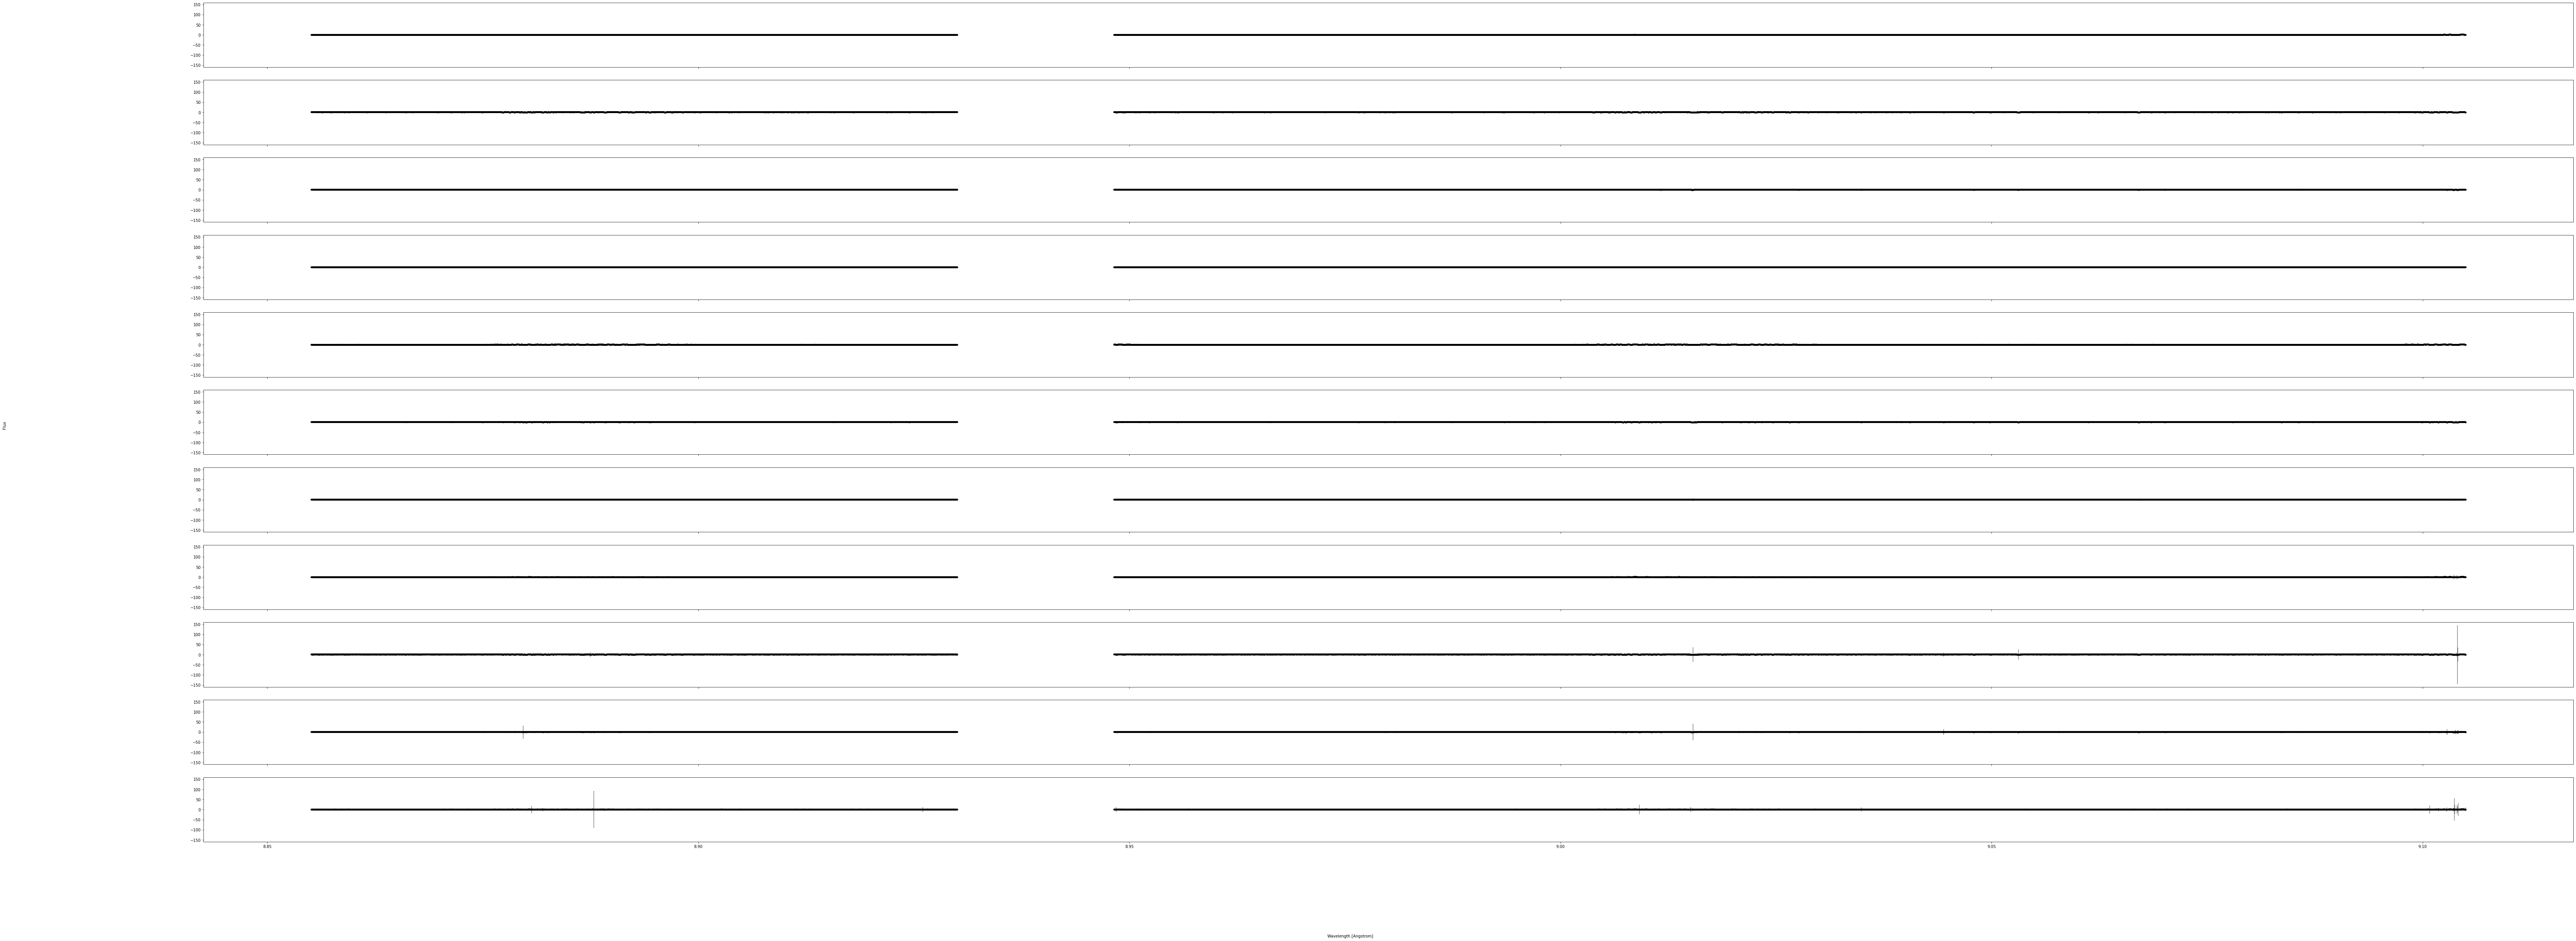

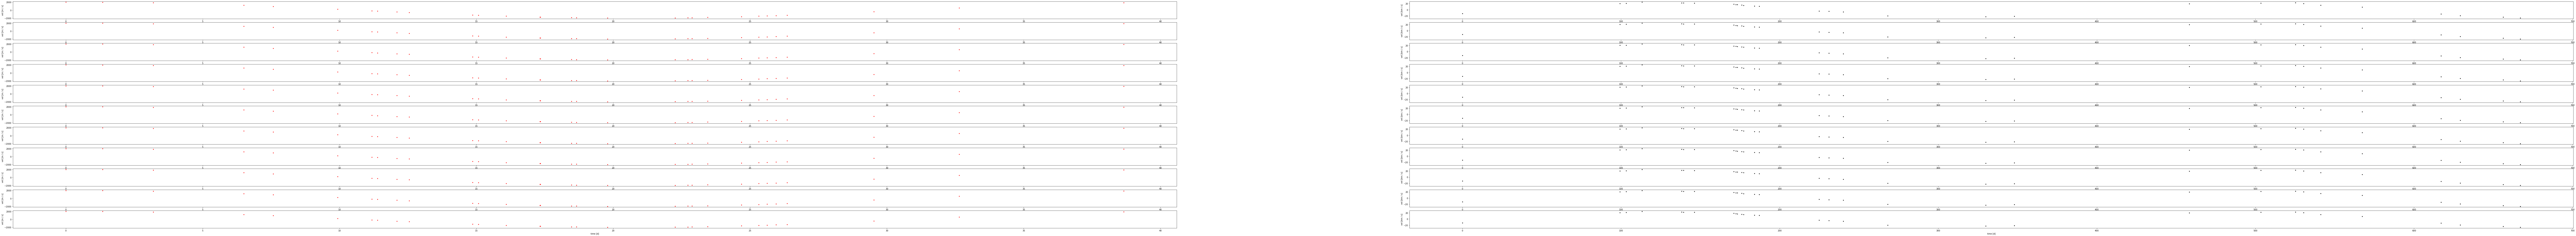

In [13]:
sigma = 200
n_plots = 4
plt_unit = u.Angstrom
sort_times = np.argsort(obs_times)

fig, axes = plt.subplots(len(distances),figsize=(10 * len(distances),10 * n_plots),sharex=True,sharey=True)
fig.text(0.5, 0.04, 'Wavelength [{}]'.format(plt_unit), ha='center', va='center')
fig.text(0.06, 0.5, 'Flux', ha='center', va='center', rotation='vertical')

fig_rv, ax_rvs = plt.subplots(len(distances),2,figsize=(20 * len(distances),10 * 2))

for i,distance in enumerate(distances):
    stellar_model = PhoenixModel(distance,alpha,z,T,logg,target,amplitude,period)
    
    detector = Detector(stellar_model,resolution,loc,area,wave_grid,dark_current,read_noise,\
                        ccd_eff,through_put,gamma=gamma,epsilon=epsilon,w=w)
    detector.add_model(tellurics_model)
    data = detector.simulate(obs_times,exp_times)
    
    filename = os.path.join(outdir,'data_e{}_R{}_a{}_p{}_l{:3.1e}{:3.1e}_ep{}_w{}_snr{:2.1e}_tp{}'.format(epoches,resolution,\
                                                                amplitude.to(u.m/u.s).value,\
                                                                period.to(u.day).value,\
                                                                detector.lambmin.value,\
                                                                detector.lambmax.value,\
                                                               epsilon,w,np.mean(data['data']['snr_readout'][~np.isnan(data['data']['snr_readout'])]),\
                                                                  through_put))
    print(filename)
    data.to_h5(filename + '.h5')
    # Defining and plotting flux from star on detector
    j = 1
    print('{:3.2e}'.format(np.mean(data['data']['flux'][j,:])),'{:3.2e}'.format(np.mean(data['data']['ferr'][j,:])))
    flux, ferr = normalize(data['data']['flux'][j,:],data['data']['ferr'][j,:],sigma)
    axes[i].errorbar(np.log(data['data']['wave'].to(u.Angstrom).value),flux,yerr=ferr,fmt='.k',alpha=0.5)
    #     data.plot_data(axes[i],sort_times[i],xy='x',units=plt_unit)
    #     data.plot_tellurics(axes[i],sort_times[i],xy='x',units=plt_unit)#,normalize=normalize,nargs=[sigma]
    #     data.plot_gas(axes[i],sort_times[i],xy='x',units=plt_unit)
    #     data.plot_theory(axes[i],sort_times[i],xy='x',units=plt_unit)
    #     data.plot_lsf(axes[i],sort_times[i],xy='x',units=plt_unit)
    #     data.plot_star(axes[i],sort_times[i],xy='x',units=plt_unit)
    # plt.savefig('out/datatest5.png')
    
    times = at.Time([obs_times[k] + exp_times[k]/2 for k in range(len(obs_times))])
    rv = data['data']['rvs'].to(u.km/u.s)
    bc = target.radial_velocity_correction(obstime=times,location=loc).to(u.km/u.s)
    eprv = rv - bc

    v_unit = u.m/u.s
#     ax_rvs[i,0].set_ylim(-2.1,2.1)
    ax_rvs[i,0].plot((times - min(times)).to(u.day).value % period.to(u.day).value,eprv.to(v_unit).value,'.r')
    ax_rvs[i,0].set_xlabel('time [d]')
    ax_rvs[i,0].set_ylabel('vel [{}]'.format(v_unit))

    v_unit = u.km/u.s
#     ax_rvs[i,1].set_ylim(-35,35)
    ax_rvs[i,1].plot((times - min(times)).to(u.day).value,rv.to(v_unit).value,'.k')
    ax_rvs[i,1].set_xlabel('time [d]')
    ax_rvs[i,1].set_ylabel('vel [{}]'.format(v_unit))
plt.show()